## 02. Matrix analysis and dimensionality reduction

### Tasks:
+ Calculate **covariance matirx** for advertizing cost
+ Extracting **eigenvalues** and **eigenvectors**
+ Perform **SVD analysis on normalized data** and interpret the results (showing the proportion of variance explained by each principal component)

In [31]:
# import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import normalize

In [32]:
!ls

 01.eda.ipynb  '02.Matrix analysis and dimensionality reduction.ipynb'


In [33]:
df = pd.read_csv("../data/raw/advertising_Dataset.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [34]:
df_advertizing_cost = df[['TV', 'Radio', 'Newspaper']]
cov_df = df_advertizing_cost.cov()
print('covariance of dataset: \n', cov_df)

covariance of dataset: 
                     TV       Radio   Newspaper
TV         7370.949893   69.862492  105.919452
Radio        69.862492  220.427743  114.496979
Newspaper   105.919452  114.496979  474.308326


In [44]:
eigenvalues, eigenvectors = np.linalg.eig(cov_df)
print('eigen values : \n', eigenvalues)
print('------------------------------------------------------------------------')
print('eigen vectors : \n', eigenvectors)

eigen values : 
 [7373.2933766   516.07662595  176.31595901]
------------------------------------------------------------------------
eigen vectors : 
 [[ 0.99982947  0.01807077  0.00380577]
 [ 0.01001377 -0.35736234 -0.93391214]
 [ 0.01551648 -0.93379098  0.35748236]]


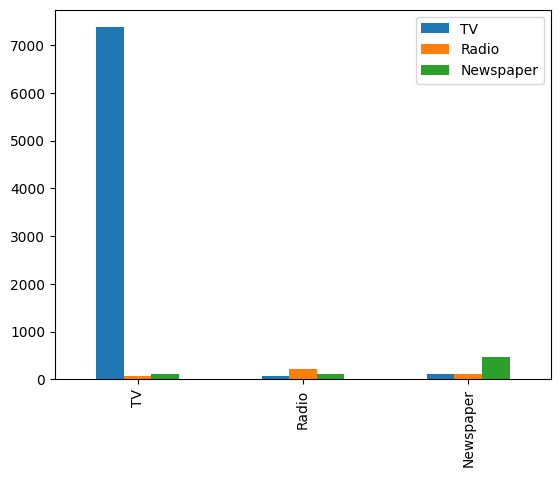

In [36]:
cov_df.plot(kind='bar')
plt.show()

<Axes: >

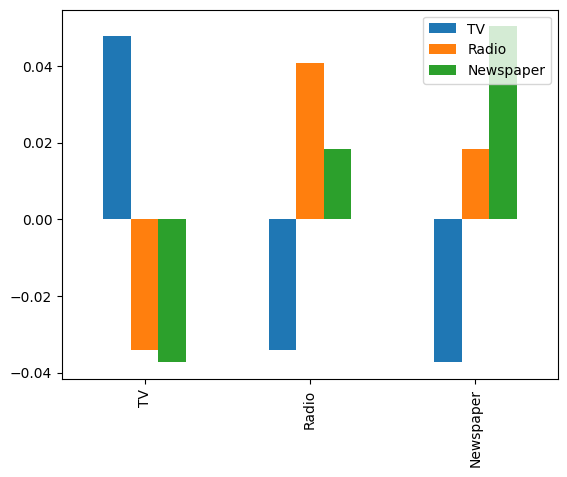

In [40]:
normalize_df = pd.DataFrame(normalize(df_advertizing_cost),
                            columns= ['TV', 'Radio', 'Newspaper'])
normalize_cov_df = normalize_df.cov()
normalize_cov_df.plot(kind='bar')

In [41]:
print(cov_df)

print('-------------------------------------------------------------------------')

print(normalize_cov_df)

                    TV       Radio   Newspaper
TV         7370.949893   69.862492  105.919452
Radio        69.862492  220.427743  114.496979
Newspaper   105.919452  114.496979  474.308326
-------------------------------------------------------------------------
                 TV     Radio  Newspaper
TV         0.047773 -0.034170  -0.037359
Radio     -0.034170  0.040826   0.018226
Newspaper -0.037359  0.018226   0.050284


In [45]:
eigenvalues_n, eigenvectors_n = np.linalg.eig(normalize_cov_df)
print('eigen values : \n', eigenvalues_n)
print('------------------------------------------------------------------------')
print('eigen vectors : \n', eigenvectors_n)

eigen values : 
 [0.10730484 0.00448759 0.02709055]
------------------------------------------------------------------------
eigen vectors : 
 [[ 0.6475684  -0.75706871  0.08661486]
 [-0.49230179 -0.50241636 -0.71078601]
 [-0.58163057 -0.4176419   0.69805524]]


### SVD

In [162]:
U, S, VT = np.linalg.svd(normalize_df, full_matrices=False) 

In [163]:
explained_variance_ratio = (S**2) / np.sum(S**2)
explained_variance_ratio


array([0.87957215, 0.09384284, 0.02658502])

PC (Principal Component) is the linear combination of TV, Radio, and Newspaper that captures the maximum variance in advertising spending. It represents the dominant pattern of variation in the dataset.


PC1 : %88

PC2 : %9

PC3 : %3